In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.dates as mdates

In [12]:
%matplotlib inline

In [13]:
data = yf.download("EURUSD=x", period="5d", interval="1h")
data.index = pd.to_datetime(data.index)
data = data.drop(columns=['Adj Close', 'Volume'])
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close
Datetime,,,,
2024-08-16 00:00:00+01:00,1.097454,1.097815,1.097454,1.097574
2024-08-16 01:00:00+01:00,1.097574,1.098056,1.097574,1.097815
2024-08-16 02:00:00+01:00,1.097936,1.098418,1.097695,1.098418
2024-08-16 03:00:00+01:00,1.098418,1.098539,1.098177,1.098418
2024-08-16 04:00:00+01:00,1.098418,1.098418,1.097936,1.097936
...,...,...,...,...
2024-08-22 06:00:00+01:00,1.114703,1.114827,1.114455,1.114703
2024-08-22 07:00:00+01:00,1.114579,1.115324,1.114455,1.115324
2024-08-22 08:00:00+01:00,1.115324,1.116196,1.113090,1.113958


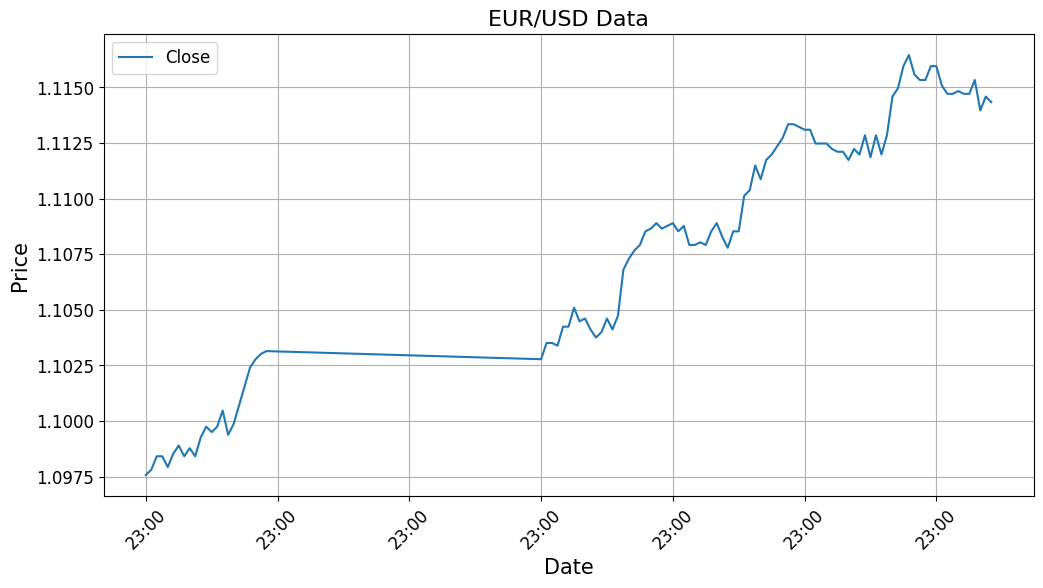

In [14]:

# Plot the close price
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data.index, data['Close'])

# Format the x-axis to show hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set the title and axis label
plt.title('EUR/USD Data', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add legend
ax.legend(['Close'], prop={'size': 12})

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

In [15]:
#Indicators
from ta.utils import dropna
from ta.volatility import BollingerBands
from ta.trend import MACD, EMAIndicator, SMAIndicator
from ta.momentum import RSIIndicator, StochasticOscillator

data = dropna(data)

# Initialize MACD Indicator
indicator_macd = MACD(close=data["Close"], window_slow=26, window_fast=12, window_sign=9)

# Add MACD features
data['macd'] = indicator_macd.macd()
data['signal'] = indicator_macd.macd_signal()
data['hist'] = indicator_macd.macd_diff()

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=data["Close"], window=20, window_dev=2)

# Add Bollinger Bands features
data['hband'] = indicator_bb.bollinger_hband()
data['lband'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=data["Close"], window=14)

# Add RSI features
data['rsi'] = indicator_rsi.rsi()

# Initialize Stochastic Oscillator
indicator_stoch = StochasticOscillator(high=data["High"], low=data["Low"], close=data["Close"], window=14, smooth_window=3)

# Add Stochastic Oscillator features
data['stoch'] = indicator_stoch.stoch()
data['stoch_signal'] = indicator_stoch.stoch_signal()

# Initialize EMA Indicator
indicator_ema = EMAIndicator(close=data["Close"], window=20)

# Add EMA features
data['ema'] = indicator_ema.ema_indicator()

# Initialize SMA Indicator
indicator_sma = SMAIndicator(close=data["Close"], window=20)

# Add SMA features
data['sma'] = indicator_sma.sma_indicator()


In [16]:
data

,Open,High,Low,Close,macd,signal,hist,hband,lband,rsi,stoch,stoch_signal,ema,sma
Datetime,,,,,,,,,,,,,,
2024-08-16 00:00:00+01:00,1.097454,1.097815,1.097454,1.097574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-16 01:00:00+01:00,1.097574,1.098056,1.097574,1.097815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-16 02:00:00+01:00,1.097936,1.098418,1.097695,1.098418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-16 03:00:00+01:00,1.098418,1.098539,1.098177,1.098418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-16 04:00:00+01:00,1.098418,1.098418,1.097936,1.097936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-22 06:00:00+01:00,1.114703,1.114827,1.114455,1.114703,0.000749,0.000962,-0.000213,1.117199,1.111911,56.573269,7.671072,34.868198,1.114441,1.114555
2024-08-22 07:00:00+01:00,1.114579,1.115324,1.114455,1.115324,0.000734,0.000916,-0.000182,1.117221,1.112138,61.122590,26.863474,23.759433,1.114525,1.114680
2024-08-22 08:00:00+01:00,1.115324,1.116196,1.113090,1.113958,0.000605,0.000854,-0.000249,1.117003,1.112566,48.974470,18.855855,17.796800,1.114471,1.114785


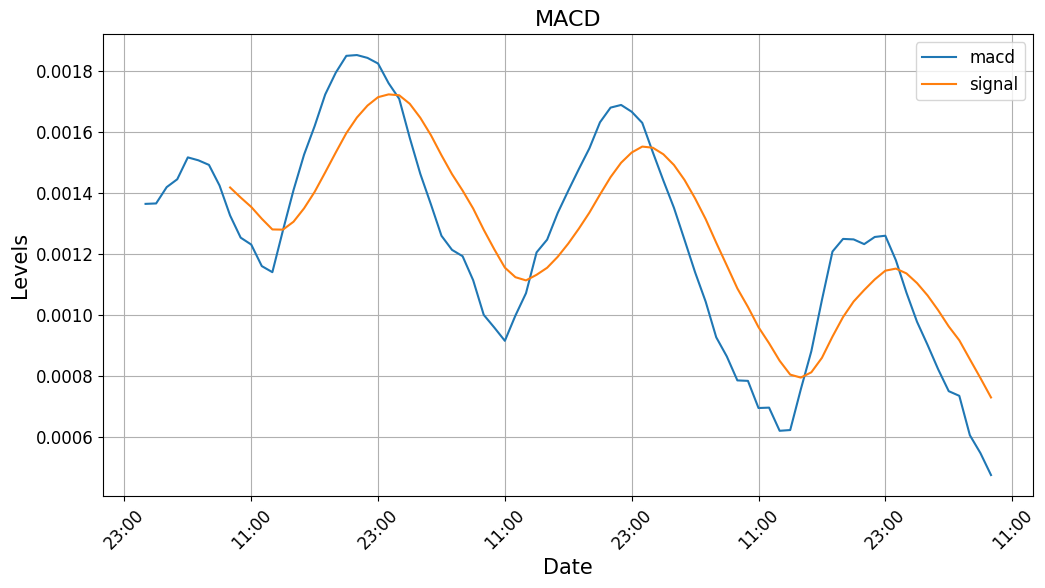

In [17]:

# Plot the close price
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data.index, data['macd'])
ax.plot(data.index, data['signal'])
# ax.hist(data['hist'], bins = 10, edgecolor='black')


# Format the x-axis to show hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set the title and axis label
plt.title('MACD', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Levels', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add legend
ax.legend(['macd', 'signal', 'hist'], prop={'size': 12})

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

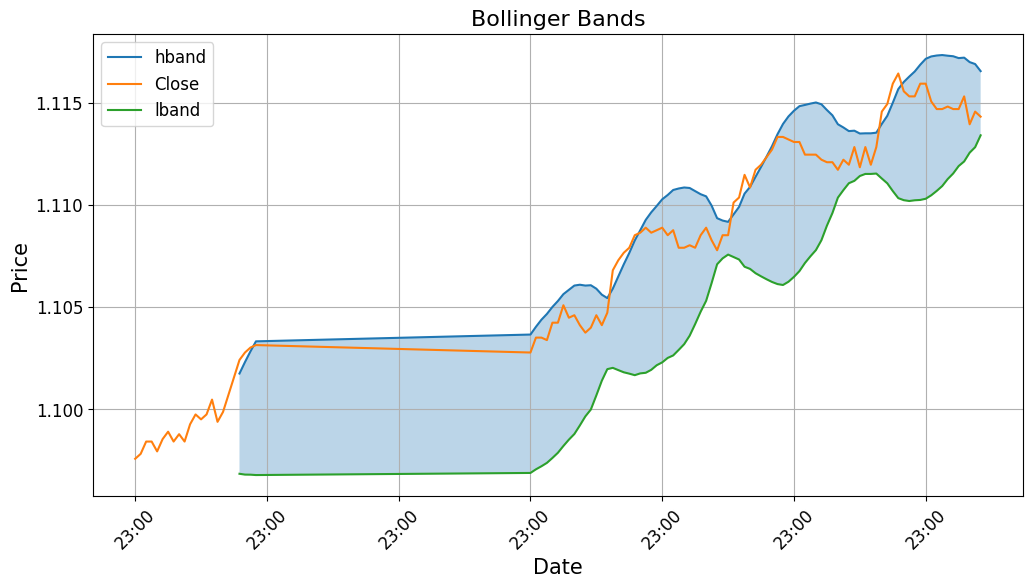

In [18]:

# Plot the close price
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data.index, data['hband'])
ax.plot(data.index, data['Close'])
ax.plot(data.index, data['lband'])
ax.fill_between(data.index, data['hband'], data['lband'], alpha=0.3)

# Format the x-axis to show hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set the title and axis label
plt.title('Bollinger Bands', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add legend
ax.legend(['hband', 'Close', 'lband'], prop={'size': 12})

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

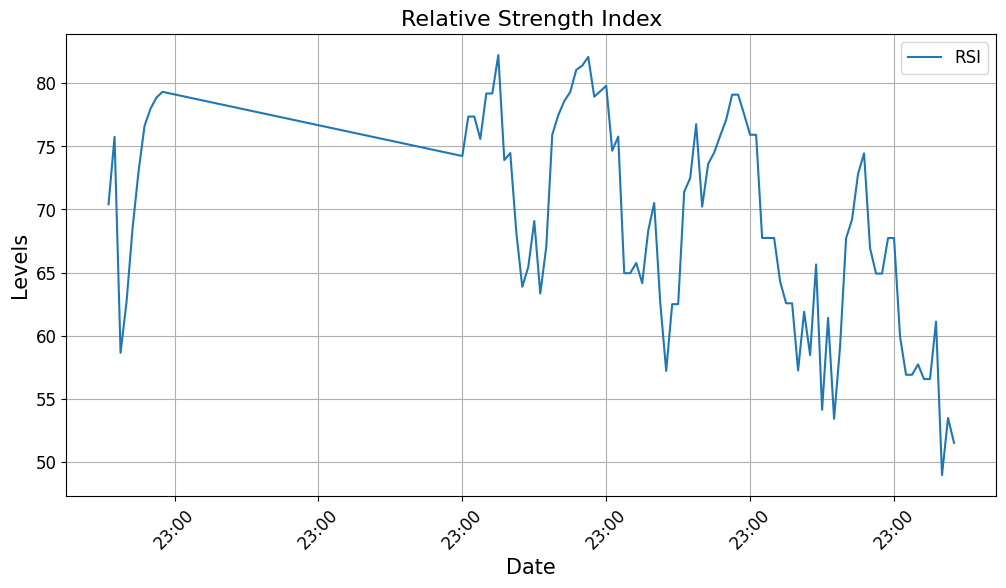

In [19]:

# Plot the close price
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data.index, data['rsi'])

# Format the x-axis to show hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set the title and axis label
plt.title('Relative Strength Index', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Levels', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add legend
ax.legend(['RSI' ], prop={'size': 12})

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

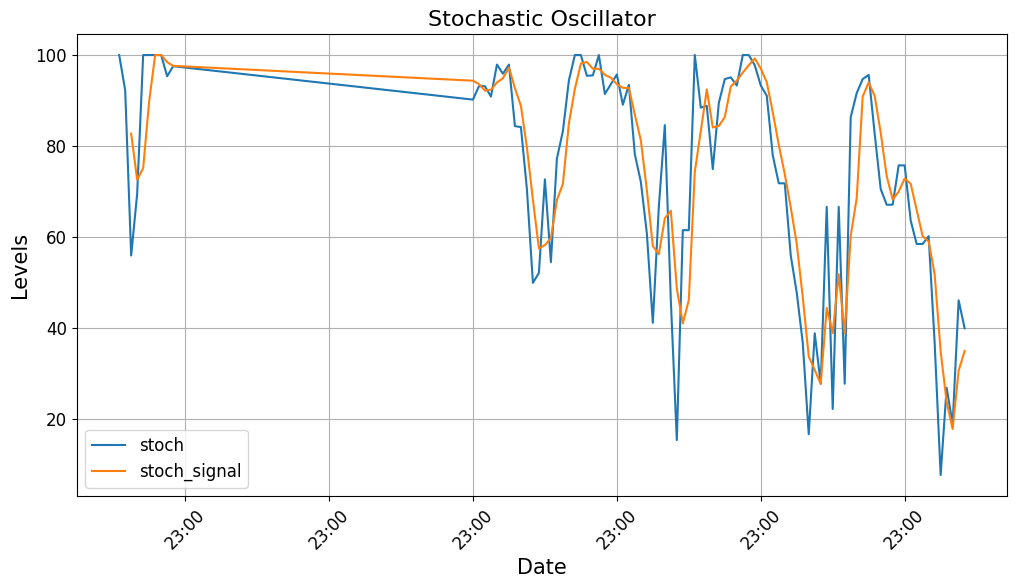

In [20]:

# Plot the close price
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data.index, data['stoch'])
ax.plot(data.index, data['stoch_signal'])

# Format the x-axis to show hours
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set the title and axis label
plt.title('Stochastic Oscillator', fontsize=16)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Levels', fontsize=15)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add legend
ax.legend(['stoch','stoch_signal' ], prop={'size': 12})

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()